In [262]:
import numpy as np      #Linear Algebra
import pandas as pd     #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [264]:
df = df.drop(['User ID', 'Gender'], axis=1)
df.sample(5)

,Age,EstimatedSalary,Purchased
91,30,116000,0
322,41,52000,0
161,25,90000,0
332,42,65000,0
144,34,25000,0


Train-Test Split

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train = df.drop('Purchased', axis=1)
y_train = df['Purchased']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0
)
X_train.shape, X_test.shape

((280, 2), (120, 2))

StandardScaler

In [268]:
from sklearn.preprocessing import StandardScaler

In [269]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [270]:
# age mean , salary mean
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [271]:
# pandas dataframe
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [272]:
# numpy array
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [273]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [274]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [275]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [276]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

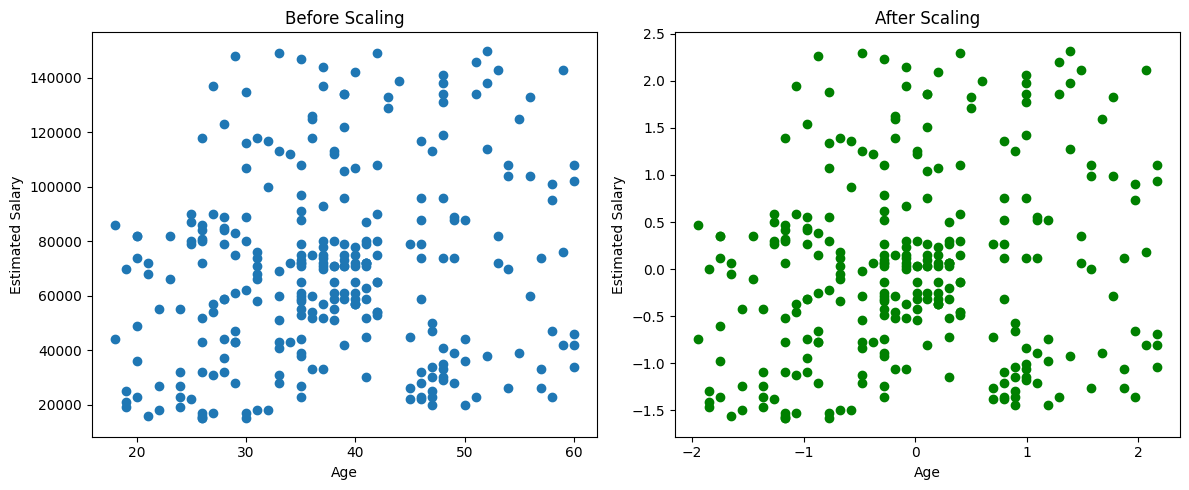

In [277]:
# Before Scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)    #1row, 2cols, 1plots
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title('Before Scaling')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# After Scaling
plt.subplot(1, 2, 2)    #1row, 2cols, 1plots
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='green')
plt.title('After Scaling')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()

Probabilty Density Function Graph

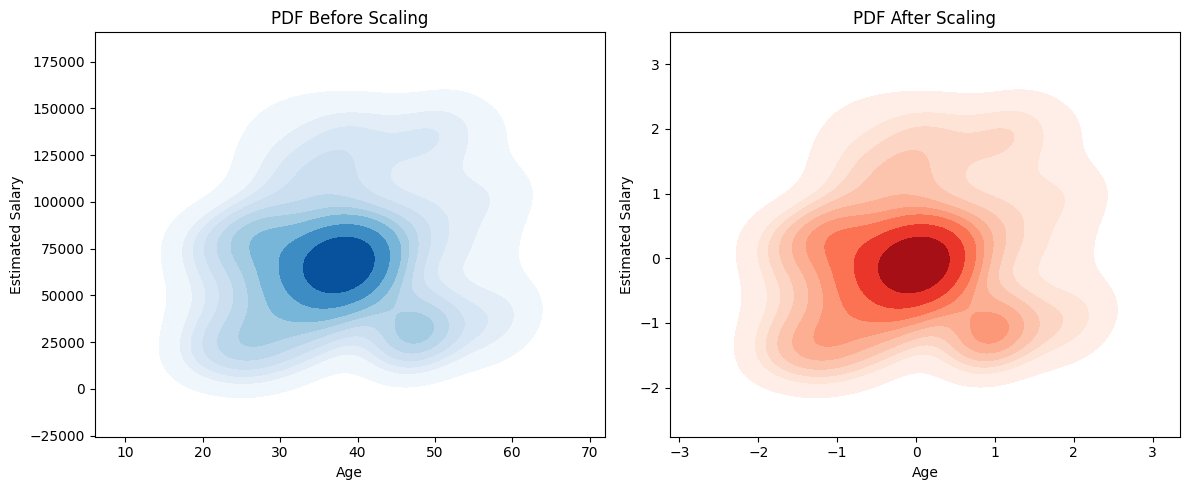

In [278]:
plt.figure(figsize=(12, 5))

# Age + Salary PDF before scaling
plt.subplot(1, 2, 1)
sns.kdeplot(x=X_train['Age'], y=X_train['EstimatedSalary'], fill=True, cmap="Blues")
plt.title("PDF Before Scaling")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

# Age + Salary PDF after scaling
plt.subplot(1, 2, 2)
sns.kdeplot(x=X_train_scaled['Age'], y=X_train_scaled['EstimatedSalary'], fill=True, cmap="Reds")
plt.title("PDF After Scaling")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.tight_layout()
plt.show()


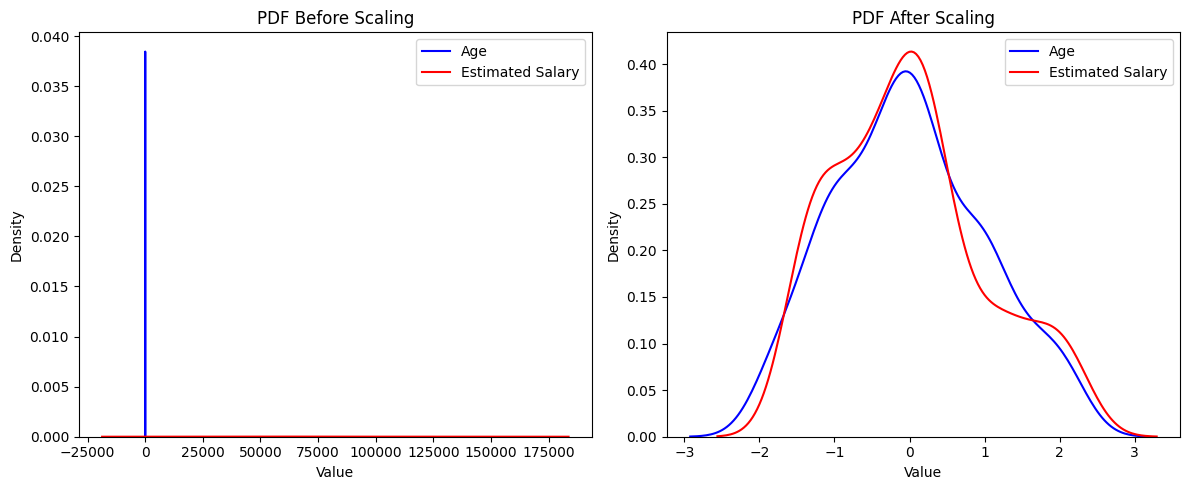

In [279]:

plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
sns.kdeplot(x=X_train['Age'], label="Age", color="blue")
sns.kdeplot(x=X_train['EstimatedSalary'], label="Estimated Salary", color="red")
plt.title("PDF Before Scaling")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# After scaling
plt.subplot(1, 2, 2)
sns.kdeplot(x=X_train_scaled['Age'], label="Age", color="blue")
sns.kdeplot(x=X_train_scaled['EstimatedSalary'], label="Estimated Salary", color="red")
plt.title("PDF After Scaling")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


Logistic Regression 

In [280]:
from sklearn.linear_model import LogisticRegression

In [281]:
lr = LogisticRegression()
lr_scaled = LogisticRegression() 

In [282]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [283]:
y_pred = lr_train.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

Evaluation 

In [284]:
from sklearn.metrics import accuracy_score

In [285]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.3416666666666667
Scaled 0.8666666666666667


Decision Tree Classifier

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [288]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [289]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt.predict(X_test)

Evaluation 

In [290]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.875


In [291]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
